1) Import & Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

data = pd.read_csv(r'd:\myproj\ml\5\gbm-data.csv')
trgt = data['Activity'].values
del data['Activity']
feat = data.values
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
X_train, X_test, y_train, y_test = train_test_split(feat, trgt, test_size=0.8, random_state=241)

2) Learn model

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
test_score = np.zeros(shape=(len(learning_rates),250))
for i, lr in enumerate(learning_rates):
    clf = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=lr)
    clf.fit(X_train, y_train)
    for j, y_predicted_classes in enumerate(clf.staged_predict_proba(X_test)):
        y_predicted_f = np.array([item[1] for item in y_predicted_classes])
        #print(y_predicted_f)
        #print(y_predicted_f.shape)
        test_score[i][j]=log_loss(y_test, y_predicted_f)

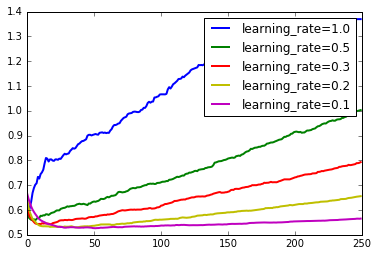

In [10]:
plt.figure()
plt.plot(test_score[0], 'b', linewidth=2)
plt.plot(test_score[1], 'g', linewidth=2)
plt.plot(test_score[2], 'r', linewidth=2)
plt.plot(test_score[3], 'y', linewidth=2)
plt.plot(test_score[4], 'm', linewidth=2)
plt.legend(['learning_rate=1.0', 'learning_rate=0.5', 'learning_rate=0.3', 'learning_rate=0.2', 'learning_rate=0.1'])
plt.show()

In [11]:
for i in range(len(learning_rates)):
    print('learning rate =', learning_rates[i], 'step =', np.argmin(test_score[i])+1, 'value =', test_score[i][np.argmin(test_score[i])])

learning rate = 1 step = 1 value = 0.582294259428
learning rate = 0.5 step = 7 value = 0.558202552316
learning rate = 0.3 step = 19 value = 0.542745177343
learning rate = 0.2 step = 37 value = 0.530439819735
learning rate = 0.1 step = 52 value = 0.526464613826


In [14]:
from sklearn.ensemble import RandomForestClassifier 
clf_rf = RandomForestClassifier(n_estimators=37, random_state=241)
clf_rf = clf_rf.fit(X_train, y_train)
y_predicted_classes = clf_rf.predict_proba(X_test)
y_predicted_f = np.array([item[1] for item in y_predicted_classes])
print('Random forest log_loss = ', log_loss(y_test, y_predicted_f))

Random forest log_loss =  0.540911909937
